In [105]:
from fastai.vision.all import *
from fastdownload import *
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [106]:
# Get MNIST data
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/testing'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training')]

In [107]:
# get training image folder
path = path.ls()[1]
path.ls()


(#10) [Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/0'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/1'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/2'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/3'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/4'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/5'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/6'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/7'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/8'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/training/9')]

In [109]:
# show sample image
dest = get_image_files(path)[0]
im = Image.open(dest)
im.to_thumb(28,28)

In [143]:
# let's check the name of the images if it has labels

def check_dir(path, display_im_filenames = True):
    counts_dict = {}
    for folder in path.ls():
        if folder.is_dir():
            digit= folder.parts[-1]
            ims = get_image_files(folder)
            num_ims = len(ims)
            counts_dict[digit] = num_ims
            sample_ims = ims[:2] # get 2 images
            if display_im_filenames:
                print('Folder of digit: ',digit)
                print([im.parts[-1] for im in sample_ims])
                print('')
            
    return pd.DataFrame(counts_dict.items(), columns=['Digit', 'Count'])


In [144]:
check_dir(path, display_im_filenames = True)    

Folder of digit:  0
['1.png', '1000.png']

Folder of digit:  1
['10006.png', '10007.png']

Folder of digit:  2
['10009.png', '10016.png']

Folder of digit:  3
['10.png', '10000.png']

Folder of digit:  4
['10013.png', '10018.png']

Folder of digit:  5
['0.png', '100.png']

Folder of digit:  6
['10017.png', '10032.png']

Folder of digit:  7
['10002.png', '1001.png']

Folder of digit:  8
['10001.png', '10012.png']

Folder of digit:  9
['10003.png', '10004.png']



,Digit,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


- we can see there is no correlation of label in image filenames. So, no need to use from_name_func like we used in PETS.
- But we can modify how from_name_func is defined and then use it

We will use following methods for creating dataloader

- [] from_path : Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)
- [] from_path_re
- [x] from_folder
- [] from_name_func


In [136]:
# load images in Dataloaders
dls =ImageDataLoaders.from_folder(path,
                             valid_pct=0.2, seed=42,
                             item_tfms=None,
                             bs=32)


In [138]:
learner = vision_learner(dls, resnet18, metrics = error_rate)
learner.fine_tune(2)


C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.721711,0.505217,0.159750,05:27


epoch,train_loss,valid_loss,error_rate,time
0,0.147534,0.070593,0.022500,01:58
1,0.066968,0.038201,0.012583,01:58


In [150]:
learner.export(os.getcwd()+'/mnist_18.pkl')

In [155]:
learner.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [151]:
# Check test Datset
test_folder_path = Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_png/testing')
check_dir(test_folder_path, display_im_filenames=False)

,Digit,Count
0,0,980
1,1,1135
2,2,1032
3,3,1010
4,4,982
5,5,892
6,6,958
7,7,1028
8,8,974
9,9,1009


In [157]:
# Checking Test Accuracy 

# Path to the trained model
model_path = os.getcwd()+'/mnist_18.pkl'

# Load the trained model
learn = load_learner(model_path)

# create Test dataloader for test with linking training Dataloader. It will automatically link the orocess of getting labels for test dataset with Train dataloader's ex: from_folder in this case
test_dl = learn.dls.test_dl(get_image_filesage_files(test_folder_path), with_labels=True) # we only need to give image files path and 
                                                                    # process to get the labels will be taken from dls : which is from_folder
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()

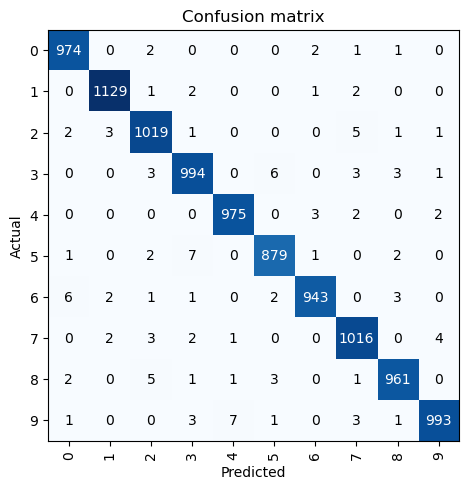

In [122]:
pat = r'\\([^\\]*)\\\d+.png$' # stop at 1 folder before
print(dest)
match = re.search(pat, str(dest))   # image path has '\'. replace this with '/'
print(match[1])

C:\Users\mgupta70.ASURITE\.fastai\data\mnist_png\training\0\1.png
0


# path_re

In [12]:
# Basic tutorial
import re

# this we can modify. 
pat = r'/([^/]*)/\d+.png$'

# Hypothetical image filename
filename = '/oxford/images/cat/123.png'

# Using re.search() to apply the pattern and extract the label
match = re.search(pat, filename)

# Check if there's a match and extract the label if found
if match:
    label = match.group(1)
    print("Extracted label:", label)
else:
    print("No label extracted. The filename may not match the pattern.")


Extracted label: cat


In [10]:
path = Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images')

In [11]:
get_image_files(path)

(#7390) [Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/mgupta70.ASURITE/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...]

In [103]:
pat = r'\\([^\\]*)_\d+.jpg$'

filename = get_image_files(path)[0]; print(filename)
match = re.search(pat, str(filename))   # image path has '\'. replace this with '/'
print(match[1])


C:\Users\mgupta70.ASURITE\.fastai\data\oxford-iiit-pet\images\Abyssinian_1.jpg
Abyssinian


In [89]:
pat = r'\\([^\\]*)_\d+.jpg$'
filename = "C:\\Users\\mgupta70.ASURITE\\.fastai\\data\\oxford-iiit-pet\\images\\Abyssinian_1.jpg"
match = re.search(pat, filename)
print(match[1])


Abyssinian


In [99]:
# Let's develop our pat function
# we want to do 37 classes classification

# pattern
pat = r'/([^/]*)_\d+.jpg$'

## sample example-1
# filename = '/oxford/images/cat_123.jpg'
# match = re.search(pat, filename)
# print(match[1])

# sample example-2
filename = get_image_files(path)[0]; print(filename)
match = re.search(pat, str(filename).replace('\\','/'))   # image path has '\'. replace this with '/'
print(match[1])

C:\Users\mgupta70.ASURITE\.fastai\data\oxford-iiit-pet\images\Abyssinian_1.jpg
Abyssinian
